### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [37]:
import csv
import urllib.request

def ler_csv(url):
    resposta = urllib.request.urlopen(url)
    linhas = resposta.read().decode("utf-8").splitlines()
    leitor = csv.DictReader(linhas)
    dados = []
    for linha in leitor:
        dados.append(linha)
    return dados

loja1 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv")
loja2 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv")
loja3 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv")
loja4 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv")

todas_vendas = loja1 + loja2 + loja3 + loja4

faturamento_total = 0

for venda in todas_vendas:
    valor = float(venda["Preço"])
    faturamento_total += valor
print("Faturamento total das quatro lojas: R$ {:.2f}".format(faturamento_total))


Faturamento total das quatro lojas: R$ 5871490.79


# 2. Vendas por Categoria


In [36]:
import csv
import urllib.request

def ler_csv(url):
    resposta = urllib.request.urlopen(url)
    linhas = resposta.read().decode("utf-8").splitlines()
    leitor = csv.DictReader(linhas)
    dados = []
    for linha in leitor:
        dados.append(linha)
    return dados

loja1 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv")
loja2 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv")
loja3 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv")
loja4 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv")

def faturamento_por_categoria(lista_vendas):
    categorias = {}
    for venda in lista_vendas:
        categoria = venda["Categoria do Produto"]
        valor = float(venda["Preço"])
        if categoria in categorias:
            categorias[categoria] += valor
        else:
            categorias[categoria] = valor
    return categorias

faturamento_loja1 = faturamento_por_categoria(loja1)
faturamento_loja2 = faturamento_por_categoria(loja2)
faturamento_loja3 = faturamento_por_categoria(loja3)
faturamento_loja4 = faturamento_por_categoria(loja4)

print("\nFaturamento por categoria - Loja 1")
for categoria, valor in faturamento_loja1.items():
    print(f"{categoria}: R$ {valor:.2f}")

print("\nFaturamento por categoria - Loja 2")
for categoria, valor in faturamento_loja2.items():
    print(f"{categoria}: R$ {valor:.2f}")

print("\nFaturamento por categoria - Loja 3")
for categoria, valor in faturamento_loja3.items():
    print(f"{categoria}: R$ {valor:.2f}")

print("\nFaturamento por categoria - Loja 4")
for categoria, valor in faturamento_loja4.items():
    print(f"{categoria}: R$ {valor:.2f}")



Faturamento por categoria - Loja 1
eletronicos: R$ 572659.23
moveis: R$ 250178.11
brinquedos: R$ 23993.78
eletrodomesticos: R$ 484913.36
utilidades domesticas: R$ 16931.48
esporte e lazer: R$ 52387.55
livros: R$ 11713.92
instrumentos musicais: R$ 121731.69

Faturamento por categoria - Loja 2
moveis: R$ 235234.68
instrumentos musicais: R$ 139987.03
esporte e lazer: R$ 46326.09
eletronicos: R$ 547773.71
utilidades domesticas: R$ 19662.86
brinquedos: R$ 21262.21
eletrodomesticos: R$ 464758.13
livros: R$ 13454.35

Faturamento por categoria - Loja 3
eletrodomesticos: R$ 438984.89
moveis: R$ 268095.56
instrumentos musicais: R$ 103174.45
esporte e lazer: R$ 47456.10
eletronicos: R$ 547699.92
brinquedos: R$ 25869.20
utilidades domesticas: R$ 20080.21
livros: R$ 12664.70

Faturamento por categoria - Loja 4
eletrodomesticos: R$ 377680.65
moveis: R$ 256705.65
esporte e lazer: R$ 44465.65
livros: R$ 12427.77
eletronicos: R$ 545966.86
instrumentos musicais: R$ 100136.50
brinquedos: R$ 27015.67
uti

# 3. Média de Avaliação das Lojas

In [42]:
import csv
import urllib.request

def ler_csv(url):
    resposta = urllib.request.urlopen(url)
    linhas = resposta.read().decode("utf-8").splitlines()
    leitor = csv.DictReader(linhas)
    dados = []
    for linha in leitor:
        dados.append(linha)
    return dados

def media_avaliacao(lista_vendas):
    soma = 0
    quantidade = 0
    for venda in lista_vendas:
        try:
            avaliacao = float(venda["Avaliação da compra"])
            soma += avaliacao
            quantidade += 1
        except ValueError:
            continue

    if quantidade == 0:
        return 0
    return soma / quantidade

loja1 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv")
loja2 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv")
loja3 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv")
loja4 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv")

media1 = media_avaliacao(loja1)
media2 = media_avaliacao(loja2)
media3 = media_avaliacao(loja3)
media4 = media_avaliacao(loja4)

print("\nMédia de Avaliação das Lojas:")
print(f"Loja 1: {media1:.2f}")
print(f"Loja 2: {media2:.2f}")
print(f"Loja 3: {media3:.2f}")
print(f"Loja 4: {media4:.2f}")



Média de Avaliação das Lojas:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [43]:
import csv
import urllib.request

def ler_csv(url):
    resposta = urllib.request.urlopen(url)
    linhas = resposta.read().decode("utf-8").splitlines()
    leitor = csv.DictReader(linhas)
    dados = []
    for linha in leitor:
        dados.append(linha)
    return dados

def contar_vendas_por_produto(lista_vendas):
    contagem = {}
    for venda in lista_vendas:
        produto = venda["Produto"]
        if produto in contagem:
            contagem[produto] += 1
        else:
            contagem[produto] = 1
    return contagem

def mais_e_menos_vendidos(contagem):
    mais_vendido = None
    menos_vendido = None
    maior = -1
    menor = float('inf')
    for produto, qtd in contagem.items():
        if qtd > maior:
            maior = qtd
            mais_vendido = produto
        if qtd < menor:
            menor = qtd
            menos_vendido = produto
    return mais_vendido, maior, menos_vendido, menor

loja1 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv")
loja2 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv")
loja3 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv")
loja4 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv")

for i, loja in enumerate([loja1, loja2, loja3, loja4], start=1):
    contagem = contar_vendas_por_produto(loja)
    mais, qtd_mais, menos, qtd_menos = mais_e_menos_vendidos(contagem)
    print(f"\nLoja {i}:")
    print(f"Produto mais vendido: {mais} ({qtd_mais} vendas)")
    print(f"Produto menos vendido: {menos} ({qtd_menos} vendas)")



Loja 1:
Produto mais vendido: Micro-ondas (60 vendas)
Produto menos vendido: Headset (33 vendas)

Loja 2:
Produto mais vendido: Iniciando em programação (65 vendas)
Produto menos vendido: Jogo de tabuleiro (32 vendas)

Loja 3:
Produto mais vendido: Kit banquetas (57 vendas)
Produto menos vendido: Blocos de montar (35 vendas)

Loja 4:
Produto mais vendido: Cama box (62 vendas)
Produto menos vendido: Guitarra (33 vendas)


# 5. Frete Médio por Loja


In [44]:
import csv
import urllib.request

def ler_csv(url):
    resposta = urllib.request.urlopen(url)
    linhas = resposta.read().decode("utf-8").splitlines()
    leitor = csv.DictReader(linhas)
    dados = []
    for linha in leitor:
        dados.append(linha)
    return dados

def frete_medio(vendas):
    soma_frete = 0
    contador = 0
    for venda in vendas:
        try:
            frete = float(venda["Frete"])
            soma_frete += frete
            contador += 1
        except ValueError:
            continue
    if contador == 0:
        return 0
    return soma_frete / contador

loja1 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv")
loja2 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv")
loja3 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv")
loja4 = ler_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv")

frete1 = frete_medio(loja1)
frete2 = frete_medio(loja2)
frete3 = frete_medio(loja3)
frete4 = frete_medio(loja4)

print("\nFrete médio por loja:")
print(f"Loja 1: R$ {frete1:.2f}")
print(f"Loja 2: R$ {frete2:.2f}")
print(f"Loja 3: R$ {frete3:.2f}")
print(f"Loja 4: R$ {frete4:.2f}")



Frete médio por loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


#Gráficos

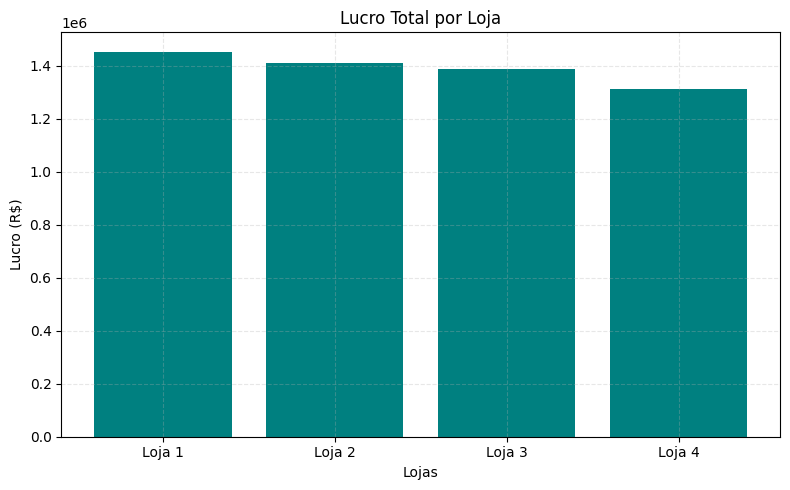

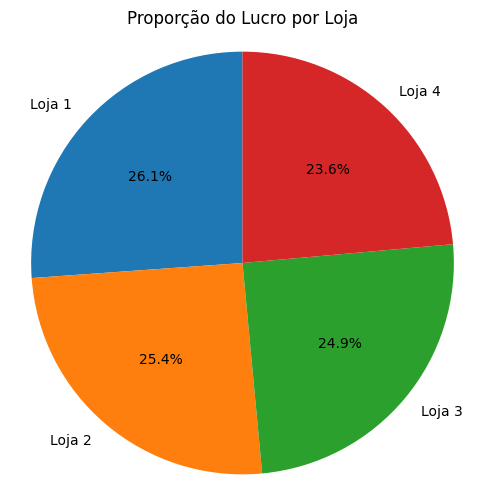

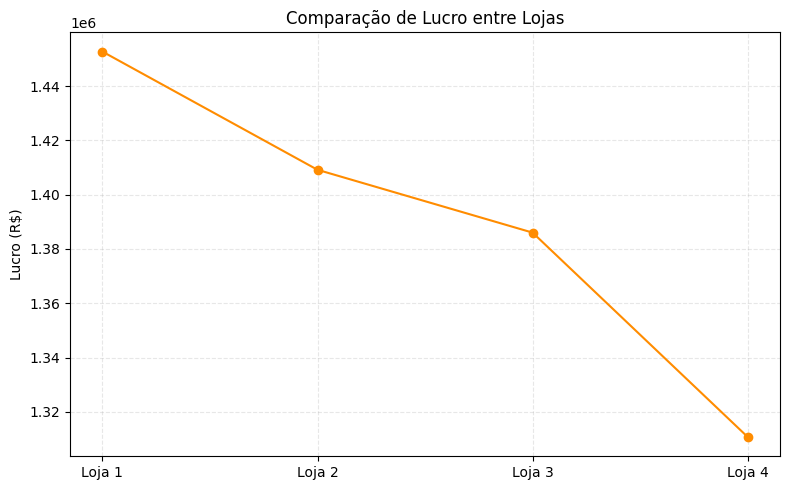

In [46]:
import csv
import urllib.request
import matplotlib.pyplot as plt

def ler_csv(url):
    resposta = urllib.request.urlopen(url)
    linhas = resposta.read().decode("utf-8").splitlines()
    leitor = csv.DictReader(linhas)
    dados = []
    for linha in leitor:
        dados.append(linha)
    return dados

def calcular_lucro(vendas):
    total = 0
    for venda in vendas:
        try:
            valor = float(venda["Preço"])
            frete = float(venda["Frete"])
            lucro = valor - frete
            total += lucro
        except ValueError:
            continue
    return total

urls = [
    ("Loja 1", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"),
    ("Loja 2", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"),
    ("Loja 3", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"),
    ("Loja 4", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv")
]

nomes_lojas = []
lucros_lojas = []

for nome, url in urls:
    dados = ler_csv(url)
    lucro = calcular_lucro(dados)
    nomes_lojas.append(nome)
    lucros_lojas.append(lucro)

plt.figure(figsize=(8, 5))
plt.bar(nomes_lojas, lucros_lojas, color='teal')
plt.title("Lucro Total por Loja")
plt.ylabel("Lucro (R$)")
plt.xlabel("Lojas")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(lucros_lojas, labels=nomes_lojas, autopct='%1.1f%%', startangle=90)
plt.title("Proporção do Lucro por Loja")
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(nomes_lojas, lucros_lojas, marker='o', linestyle='-', color='darkorange')
plt.title("Comparação de Lucro entre Lojas")
plt.ylabel("Lucro (R$)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#Relatorio

Basado nos dados das lojas, O senhor são joão deveria vender a loja4 com um 23.6% do faturamento.